<a href="https://colab.research.google.com/github/Kimhantag/Posco_AIBigdata_Academy25_edu/blob/main/3.Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# Load GPU

In [ ]:
!nvidia-smi

Tue Apr  9 05:24:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

---
# Load CIFAR10

In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(type(x_trainval), x_trainval.shape)
print(type(y_trainval), y_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size= 1/6, shuffle=True, stratify = y_trainval, random_state=34)
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (50000, 1)
<class 'numpy.ndarray'> (41666, 32, 32, 3)
<class 'numpy.ndarray'> (41666, 1)


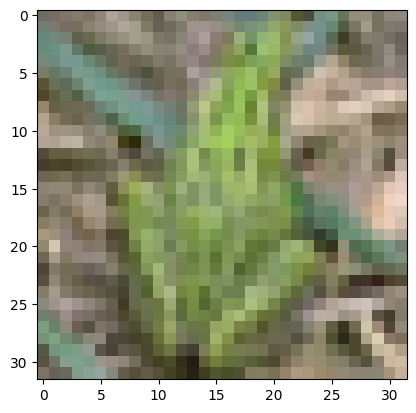

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Scale to [0, 1]
x_train, x_valid, x_test = x_train.astype('float32') / 255 , x_valid.astype('float32') / 255, x_test.astype('float32') / 255

In [ ]:
# x_train 배열의 첫 번째 요소의 형태를 출력합니다.
print(x_train[0].shape)

# 첫 번째 요소의 형태의 모든 요소들을 곱하여 특성의 총 개수를 계산합니다.
# 이는 NumPy 배열의 shape 속성이 배열의 형태를 나타내는 튜플을 반환하기 때문에 수행됩니다.
# 이 튜플의 모든 요소를 곱함으로써 총 요소의 개수를 얻을 수 있으며, 이는 특성의 개수를 나타냅니다.
num_features = np.prod(x_train[0].shape)

# 계산된 특성의 개수를 출력합니다.
print(num_features)

(32, 32, 3)
3072


In [ ]:
x_train = x_train.reshape(-1, num_features)
x_valid = x_valid.reshape(-1, num_features)
x_test = x_test.reshape(-1, num_features)
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 3072) (8334, 3072) (10000, 3072)


---
# Train

In [ ]:
def train(net, x_train, y_train, x_valid, y_valid, x_test, y_test):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    net.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    result = net.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_data = (x_valid, y_valid), verbose = 0)

    print('Test accuracy')

    test_result = net.evaluate(x_test, y_test)

    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

In [ ]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

---
# Sigmoid VS ReLU

In [ ]:
class ActivationNet(Model):
    # Set layers.
    def __init__(self, activation, num_classes=10):
        super(ActivationNet, self).__init__()
        self.fc1 = layers.Dense(64, activation=activation)
        self.fc2 = layers.Dense(128, activation=activation)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

## Sigmoid

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 2.0105 - accuracy: 0.2808


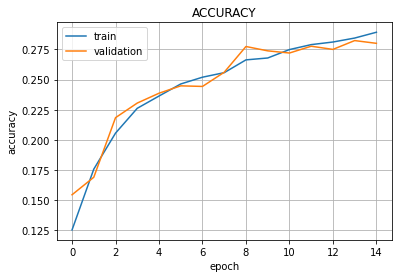

In [ ]:
net = ActivationNet('sigmoid')
train(net, *data)

## ReLU

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.5878 - accuracy: 0.4368


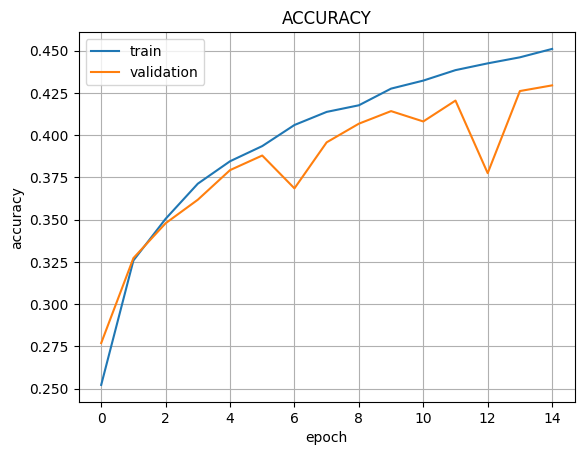

In [ ]:
net = ActivationNet('relu')
train(net, *data)

---
# Initialization
## Normal vs Xavier

In [ ]:
fc = layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal) # Xavier
print(fc.kernel_initializer)

In [ ]:
fc = layers.Dense(128, activation='relu', kernel_initializer='glorot_normal')
print(fc.kernel_initializer)

In [ ]:
class InitializationNet(Model):
    # Set layers.
    def __init__(self, initializer, num_classes=10):
        super(InitializationNet, self).__init__()
        self.fc1 = layers.Dense(128, activation='relu', kernel_initializer=initializer)
        self.fc2 = layers.Dense(128, activation='relu', kernel_initializer=initializer)
        self.out = layers.Dense(num_classes, kernel_initializer=initializer)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

In [ ]:
class InitializationNet(Model):
    # Set layers.
    def __init__(self, initializer, num_classes=10):
        super(InitializationNet, self).__init__()
        self.fc1 = layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)
        self.fc2 = layers.Dense(256, activation='sigmoid', kernel_initializer=initializer)
        self.out = layers.Dense(num_classes, kernel_initializer=initializer)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

---
# Normal

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 2.0813 - accuracy: 0.2382


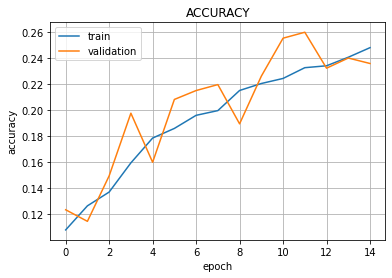

In [ ]:
net = InitializationNet('normal')
train(net, *data)

---
# Xavier


- Xavier 초기화(또는 Glorot 초기화)는 신경망 가중치를 초기화하는 방법 중 하나로, 신경망의 학습 초기 단계에서 그라디언트의 소실이나 폭발을 방지하고, 학습 과정을 안정화시키기 위해 사용됩니다. 이 초기화 방법은 Xavier Glorot와 Yoshua Bengio에 의해 2010년에 제안되었으며, 특히 활성화 함수로 하이퍼볼릭 탄젠트(tanh)나 로지스틱 시그모이드(logistic sigmoid)와 같은 S자 형태의 함수를 사용할 때 효과적입니다.
- Xavier 초기화는 활성화 함수가 선형적인 특성을 가지거나, 입력 값의 범위가 넓지 않은 경우에 잘 작동합니다. 하이퍼볼릭 탄젠트나 시그모이드와 같은 전통적인 활성화 함수와 함께 사용될 때 가장 효과적입니다.

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.9781 - accuracy: 0.3010


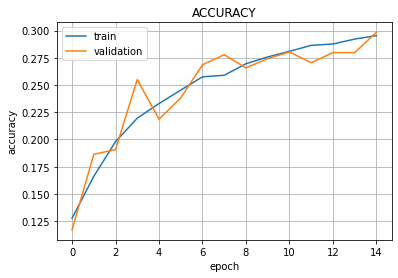

In [ ]:
net = InitializationNet('glorot_normal')
train(net, *data)

---
# Batch Normalization


배치 정규화(Batch Normalization)는 신경망 학습 과정에서 내부 공변량 변화(Internal Covariate Shift)를 줄이기 위해 사용됩니다. 내부 공변량 변화는 신경망의 각 층을 지날 때마다 입력 데이터의 분포가 변화하는 현상을 말하며, 이는 학습을 더 어렵게 만들고 학습 속도를 느리게 합니다. 배치 정규화는 이러한 문제를 해결하고 여러 가지 이점을 제공하기 위해 사용됩니다:장합니다.
)


class BNNet(Model):
    # Set layers.
    def __init__(self, num_classes=10):
        super(BNNet, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(128, activation='relu')
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.5850 - accuracy: 0.4379


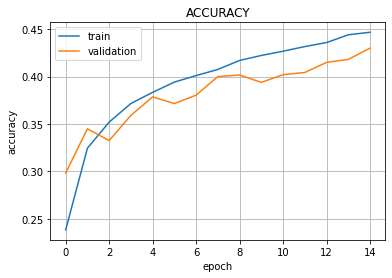

In [ ]:
net = BNNet()
train(net, *data)

In [ ]:
class BNNet(Model):
    # Set layers.
    def __init__(self, num_classes=10):
        super(BNNet, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.fc2 = layers.Dense(128, activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.5274 - accuracy: 0.4619


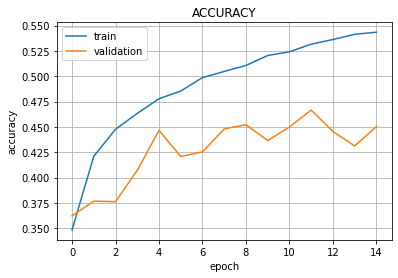

In [ ]:
net = BNNet()
train(net, *data)

---
# Optimizers

In [ ]:
class OptimizerNet(Model):
    # Set layers.
    def __init__(self, num_classes=10):
        super(OptimizerNet, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.fc2 = layers.Dense(128, activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

In [ ]:
def train_SGD(net, x_train, y_train, x_valid, y_valid, x_test, y_test):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    net.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    result = net.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_data = (x_valid, y_valid), verbose = 0)

    print('Test accuracy')

    test_result = net.evaluate(x_test, y_test)

    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

In [ ]:
def train_SGD_Momentum(net, x_train, y_train, x_valid, y_valid, x_test, y_test):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    net.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    result = net.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_data = (x_valid, y_valid), verbose = 0)

    print('Test accuracy')

    test_result = net.evaluate(x_test, y_test)

    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

In [ ]:
def train_Adam(net, x_train, y_train, x_valid, y_valid, x_test, y_test):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    net.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    result = net.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_data = (x_valid, y_valid), verbose = 0)

    print('Test accuracy')

    test_result = net.evaluate(x_test, y_test)

    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.5150 - accuracy: 0.4689


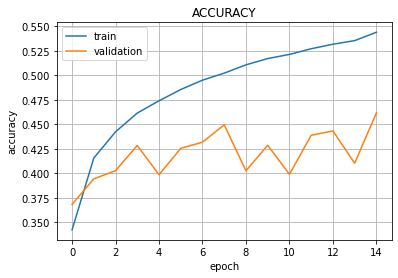

In [ ]:
net = OptimizerNet()
train_SGD(net, *data)

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.5730 - accuracy: 0.4722


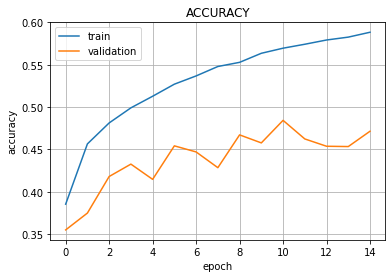

In [ ]:
net = OptimizerNet()
train_SGD_Momentum(net, *data)

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.4995 - accuracy: 0.4794


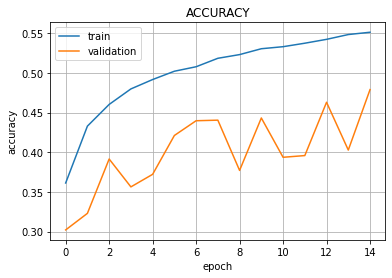

In [ ]:
net = OptimizerNet()
train_Adam(net, *data)